In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from keras.datasets import cifar10
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping

In [2]:
import glob
import os
import torch
import tarfile
import imageio
import tarfile
import pandas as pd
import numpy as np
import torchvision
from PIL import Image
import seaborn as sns
import torchvision.models as models
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import torchvision.transforms as T
from sklearn.metrics import f1_score
import torch.nn.functional as F
import torch.nn as nn
from torchvision.utils import make_grid
import matplotlib
%matplotlib inline
import torchvision.transforms as transforms
import torchvision.transforms as tt
from torchvision.datasets.utils import download_url
from torch.utils.data import Dataset, random_split, DataLoader
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator
import torch.nn as nn
import torch.nn.functional as F

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2

In [5]:
labels = ['box', 'chevron', 'rounded']
img_size = 150
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img)
                                     #cv2.IMREAD_GRAYSCALE
                                    )
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)
train = get_data("C:/Users/r04ra18/Desktop/fold/fdata_aksh/trainf")
test = get_data("C:/Users/r04ra18/Desktop/fold/fdata_aksh/validf")
val = get_data("C:/Users/r04ra18/Desktop/fold/fdata_aksh/testf")

<ipython-input-5-a5fad6a301da>:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(data)


In [6]:
# test = get_data("/content/drive/MyDrive/Ramsey_Fold_Classification/test")

C:\Users\r04ra18\Anaconda3\envs\geocomp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

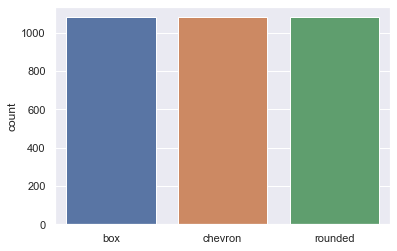

In [7]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("box")
    elif(i[1] == 1):
        l.append("chevron")
    else:
        l.append("rounded")
sns.set_style('darkgrid')
sns.countplot(l)

C:\Users\r04ra18\Anaconda3\envs\geocomp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

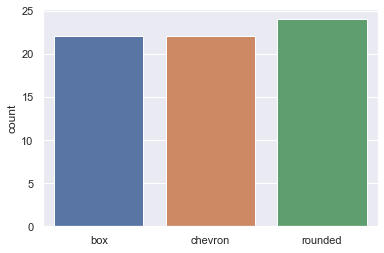

In [8]:
l = []
for i in val:
    if(i[1] == 0):
        l.append("box")
    elif(i[1] == 1):
        l.append("chevron")
    else:
        l.append("rounded")
sns.set_style('darkgrid')
sns.countplot(l)

C:\Users\r04ra18\Anaconda3\envs\geocomp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

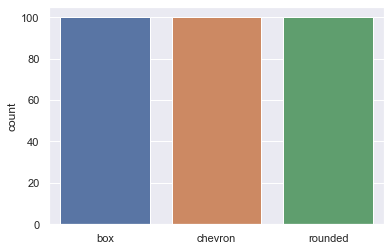

In [9]:
l = []
for i in test:
    if(i[1] == 0):
        l.append("box")
    elif(i[1] == 1):
        l.append("chevron")
    else:
        l.append("rounded")
sns.set_style('darkgrid')
sns.countplot(l)

Text(0.5, 1.0, 'box')

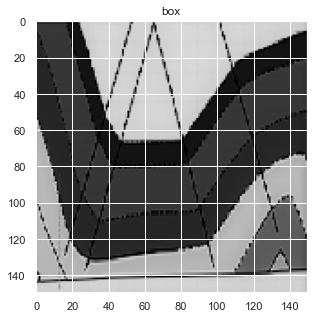

In [10]:
plt.figure(figsize = (5,5))
plt.imshow(train[1][0])
plt.title(labels[train[1][1]])

Text(0.5, 1.0, 'box')

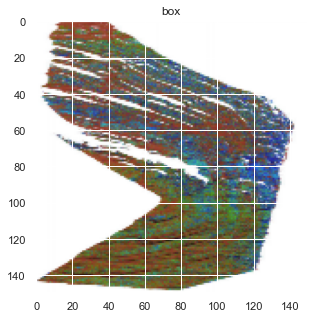

In [11]:
plt.figure(figsize = (5,5))
plt.imshow(train[100][0])
plt.title(labels[train[100][1]])

Text(0.5, 1.0, 'box')

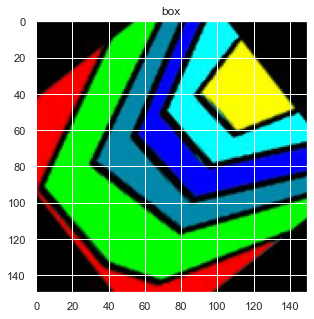

In [12]:
plt.figure(figsize = (5,5))
plt.imshow(train[1000][0])
plt.title(labels[train[1000][1]])

Text(0.5, 1.0, 'box')

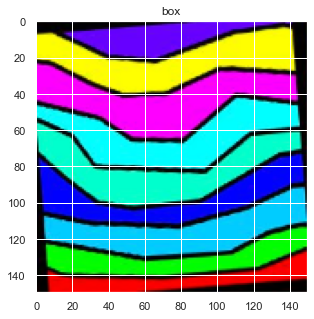

In [13]:
plt.figure(figsize = (5,5))
plt.imshow(train[150][0])
plt.title(labels[train[150][1]])

Text(0.5, 1.0, 'box')

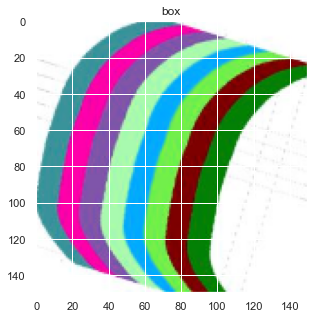

In [14]:
plt.figure(figsize = (5,5))
plt.imshow(train[800][0])
plt.title(labels[train[800][1]])

Text(0.5, 1.0, 'chevron')

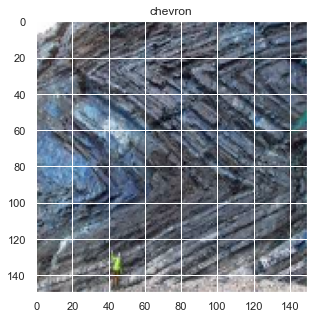

In [15]:
plt.figure(figsize = (5,5))
plt.imshow(val[40][0])
plt.title(labels[val[40][1]])

Text(0.5, 1.0, 'box')

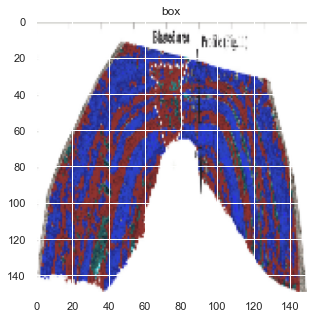

In [16]:
plt.figure(figsize = (5,5))
plt.imshow(val[15][0])
plt.title(labels[val[15][1]])

Text(0.5, 1.0, 'rounded')

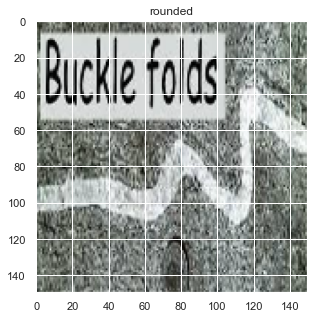

In [17]:
plt.figure(figsize = (5,5))
plt.imshow(val[50][0])
plt.title(labels[val[50][1]])

Text(0.5, 1.0, 'box')

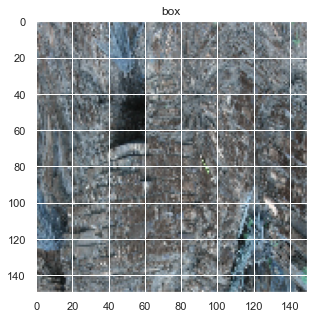

In [18]:
plt.figure(figsize = (5,5))
plt.imshow(test[2][0])
plt.title(labels[test[2][1]])

Text(0.5, 1.0, 'box')

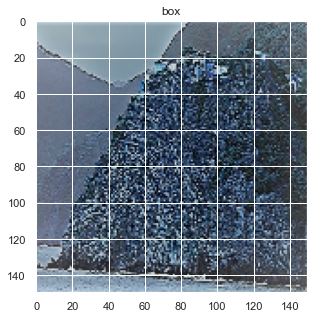

In [19]:
plt.figure(figsize = (5,5))
plt.imshow(test[1][0])
plt.title(labels[test[1][1]])

Text(0.5, 1.0, 'box')

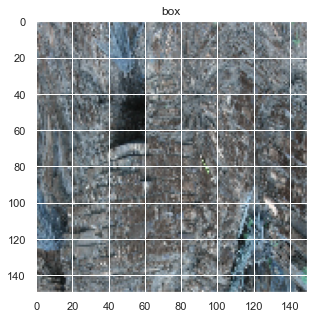

In [20]:
plt.figure(figsize = (5,5))
plt.imshow(test[2][0])
plt.title(labels[test[2][1]])

Text(0.5, 1.0, 'box')

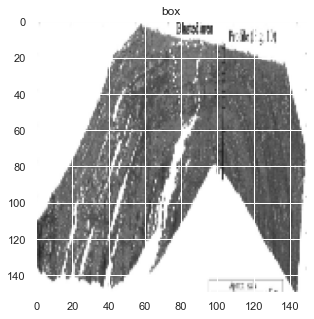

In [21]:
plt.figure(figsize = (5,5))
plt.imshow(test[10][0])
plt.title(labels[test[10][1]])

In [22]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)
# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255
# resize data for deep learning 
x_train = x_train.reshape(-1, img_size, img_size, 3)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 3)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 3)
y_test = np.array(y_test)

In [23]:
datagen = ImageDataGenerator(
        featurewise_center=True,  # set input mean to 0 over the dataset
        samplewise_center=True,  # set each sample mean to 0
        featurewise_std_normalization=True,  # divide inputs by std of the dataset
        samplewise_std_normalization=True,  # divide each input by its std
        #zca_whitening=True,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=True)  # randomly flip images


datagen.fit(x_train)

In [24]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,3)))
# model.add(BatchNormalization())
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
# model.add(BatchNormalization())
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
# model.add(Dropout(0.3))
# model.add(BatchNormalization())
model.add(MaxPool2D((2,2)))

model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.3))
# model.add(BatchNormalization())
model.add(MaxPool2D((2,2)))

model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.3))
# model.add(BatchNormalization())
model.add(MaxPool2D((2,2)))

model.add(Conv2D(512 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.3))
# model.add(Dense(units = 128 , activation = 'relu'))
# model.add(Dropout(0.3))
model.add(Dense(units = 3 , activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0

In [25]:
model.compile(optimizer = "Adam" , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [26]:
lr=0.0007

history = model.fit(datagen.flow(x_train,y_train, batch_size=64),
                    epochs = 18 , 
                    validation_data = datagen.flow(x_val, y_val))

Epoch 1/18
51/51 [==============================] - 100s 2s/step - loss: 1.2162 - accuracy: 0.3315 - val_loss: 1.2279 - val_accuracy: 0.3235
Epoch 2/18
51/51 [==============================] - 102s 2s/step - loss: 1.2181 - accuracy: 0.3333 - val_loss: 1.2279 - val_accuracy: 0.3235
Epoch 3/18
51/51 [==============================] - 108s 2s/step - loss: 1.2181 - accuracy: 0.3333 - val_loss: 1.2279 - val_accuracy: 0.3235
Epoch 4/18
51/51 [==============================] - 103s 2s/step - loss: 1.2181 - accuracy: 0.3333 - val_loss: 1.2279 - val_accuracy: 0.3235
Epoch 5/18
51/51 [==============================] - 106s 2s/step - loss: 1.2181 - accuracy: 0.3333 - val_loss: 1.2279 - val_accuracy: 0.3235
Epoch 6/18
51/51 [==============================] - 96s 2s/step - loss: 1.2181 - accuracy: 0.3333 - val_loss: 1.2279 - val_accuracy: 0.3235
Epoch 7/18
51/51 [==============================] - 99s 2s/step - loss: 1.2181 - accuracy: 0.3333 - val_loss: 1.2279 - val_accuracy: 0.3235
Epoch 8/18
51/5

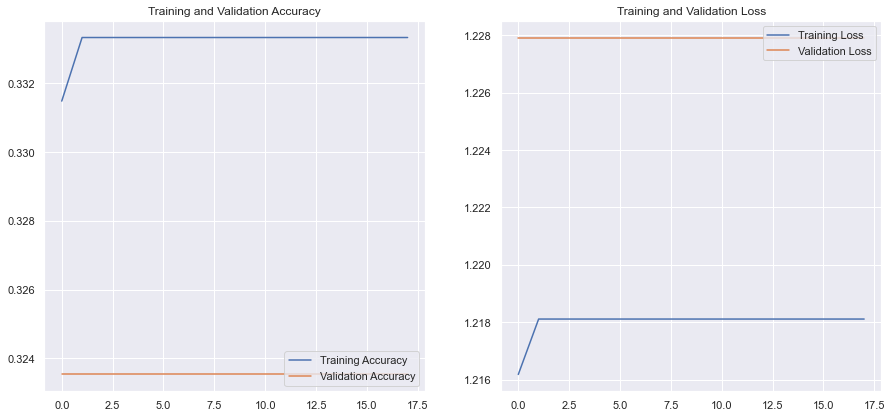

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(18)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [28]:
predictions = model.predict_classes(x_val)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_val, predictions, target_names = ['box (Class 0)', 'chevron (Class 1)', 'rounded (Class 2)']))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
                   precision    recall  f1-score   support

    box (Class 0)       0.32      1.00      0.49        22
chevron (Class 1)       0.00      0.00      0.00        22
rounded (Class 2)       0.00      0.00      0.00        24

         accuracy                           0.32        68
        macro avg       0.11      0.33      0.16        68
     weighted avg       0.10      0.32      0.16        68



C:\Users\r04ra18\Anaconda3\envs\geocomp\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
predictions = model.predict_classes(x_test)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_test, predictions, target_names = ['box (Class 0)', 'chevron (Class 1)', 'rounded (Class 2)']))

                   precision    recall  f1-score   support

    box (Class 0)       0.33      1.00      0.50       100
chevron (Class 1)       0.00      0.00      0.00       100
rounded (Class 2)       0.00      0.00      0.00       100

         accuracy                           0.33       300
        macro avg       0.11      0.33      0.17       300
     weighted avg       0.11      0.33      0.17       300



In [30]:
import tensorflow as tf
from tensorflow.python.keras.utils.vis_utils import plot_model
import pydot
from tensorflow.keras.models import Model

plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')

ModuleNotFoundError: No module named 'pydot'

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)
from collections import Counter
Counter(y_test)
selected = np.unique(y_test)
# itertoools is a standard library for all kinds of handy iterator manipulation
import itertools

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predictions)

title = 'Confusion matrix'
cmap = plt.cm.Reds

# Plot non-normalized confusion matrix.
plt.imshow(cnf_matrix, interpolation='nearest', cmap=cmap)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(selected))
plt.xticks(tick_marks, selected, rotation=45)
plt.yticks(tick_marks, selected)

# Print the support numbers inside the plot.
thresh = cnf_matrix.max() / 2.
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, format(cnf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cnf_matrix[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

In [ ]:
from keras.preprocessing import image
from keras.models import Model
layer_outputs = [layer.output for layer in model.layers[:50]]
test_image = '/content/drive/MyDrive/Ramsey_Fold_Classification_3/VAL/chevron/106.PNG'

img = image.load_img(test_image, target_size=(img_size, img_size))
img_tensor = image.img_to_array(img)
img_tensor = img_tensor.reshape(-1, img_size, img_size, 1)
# img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(img_tensor)

layer_names = ['conv2d_1', 'activation_1', 'conv2d_2', 'activation_2', 'conv2d_5', 'activation_5']
activ_list = [activations[1], activations[3], activations[11], activations[13]]

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activ_list):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0, :, :, col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image

    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='plasma')
    plt.savefig(layer_name+"_grid.jpg", bbox_inches='tight')

In [ ]:
from keras.preprocessing import image
from keras.models import Model
layer_outputs = [layer.output for layer in model.layers[:50]]
test_image = '/content/drive/MyDrive/Ramsey_Fold_Classification_3/TEST/chevron/download (13).jpg'

img = image.load_img(test_image, target_size=(img_size, img_size))
img_tensor = image.img_to_array(img)
img_tensor = img_tensor.reshape(-1, img_size, img_size, 1)
# img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(img_tensor)

layer_names = ['conv2d_1', 'activation_1', 'conv2d_2', 'activation_2', 'conv2d_5', 'activation_5']
activ_list = [activations[1], activations[3], activations[11], activations[13]]

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activ_list):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0, :, :, col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image

    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='plasma')
    plt.savefig(layer_name+"_grid.jpg", bbox_inches='tight')